# plot_presentation_Opentrons(temporary)

In [52]:
# Importing python packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os 

SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

# controls default text sizes
plt.rc('lines',markersize=8)
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [101]:
# Importing files
REPO = 'viscosity_liquid_transfer_Pablo'
folder = os.getcwd().split(REPO)[0]+REPO+r'\Opentrons_experiments\BOTorch_optimization'
std = '1275'

In [102]:
#Load data frame
if std != '1275':
    df_MOBO = pd.read_csv(folder+r'\VS_code_csv\Viscosity_std_'+std+'_exp3_withacq.csv')
if std == '1275':
    df_MOBO = pd.read_csv(folder+r'\VS_code_csv\Viscosity_std_'+std+'_exp3_withacq_more_trials.csv')

df_MOBO = df_MOBO.loc[0:39, :]

#Calculate iteration 
counter =1 
for row in df_MOBO.drop_duplicates(['aspiration_rate','dispense_rate']).iterrows():
    df_repeat = df_MOBO.loc[:,['aspiration_rate','dispense_rate']]== row[1].loc[['aspiration_rate','dispense_rate']]
    index = df_repeat.where(df_repeat.sum(axis=1)==2).dropna().index
    df_MOBO.loc[index,'iteration']=counter
    counter+=1

#Calcualte means
df_duplicates = df_MOBO.where(df_MOBO.duplicated('iteration',keep=False)==True).dropna(how='all')
df_incomplete = df_MOBO.where(df_MOBO.duplicated('iteration',keep=False)==False).dropna(how='all')
df_mean = pd.DataFrame(columns= df_MOBO.columns)

for index,values in df_duplicates.drop_duplicates(['aspiration_rate','dispense_rate']).iterrows():
    if len(df_duplicates.loc[index:index+2]) == 3:
        mean_error =df_duplicates.loc[index:index+2,'%error'].mean()
        df_duplicates.loc[index,'%error'] = mean_error
        df_duplicates.loc[index, 'volume'] ='mean'+str([300, 500, 1000])
        df_mean = pd.concat([df_mean,df_MOBO.loc[index:index+2],df_duplicates.loc[[index]]])
    else:
        df_incomplete = pd.concat([df_incomplete,df_duplicates.loc[index:index+2]]).drop_duplicates()
df_mean = pd.concat([df_mean,df_incomplete])
df_MOBO = df_mean.reset_index(drop=True)   

#Edit volumes to be all the same 
volumes = ['1000.0','500.0','300.0']
for volume in volumes:
    index = df_MOBO.where(df_SOBO.volume==volume).dropna(how='all').index
    df_MOBO.loc[index,'volume'] = volume[:-2]

In [103]:
#Load data frame
df_SOBO = pd.read_csv(folder+r'\Selina_results\SO_Optimization\SO_Viscosity_std_'+std+'.csv')

#Calculate iteration number
counter =1 
for row in df_SOBO.drop_duplicates(['aspiration_rate','dispense_rate']).iterrows():
    df_repeat = df_SOBO.loc[:,['aspiration_rate','dispense_rate']]== row[1].loc[['aspiration_rate','dispense_rate']]
    index = df_repeat.where(df_repeat.sum(axis=1)==2).dropna().index
    df_SOBO.loc[index,'iteration']=counter
    counter+=1

#Edit volumes to be all the same 
volumes = ['1000.0','500.0','300.0']
for volume in volumes:
    index = df_SOBO.where(df_SOBO.volume==volume).dropna(how='all').index
    df_SOBO.loc[index,'volume'] = volume[:-2]


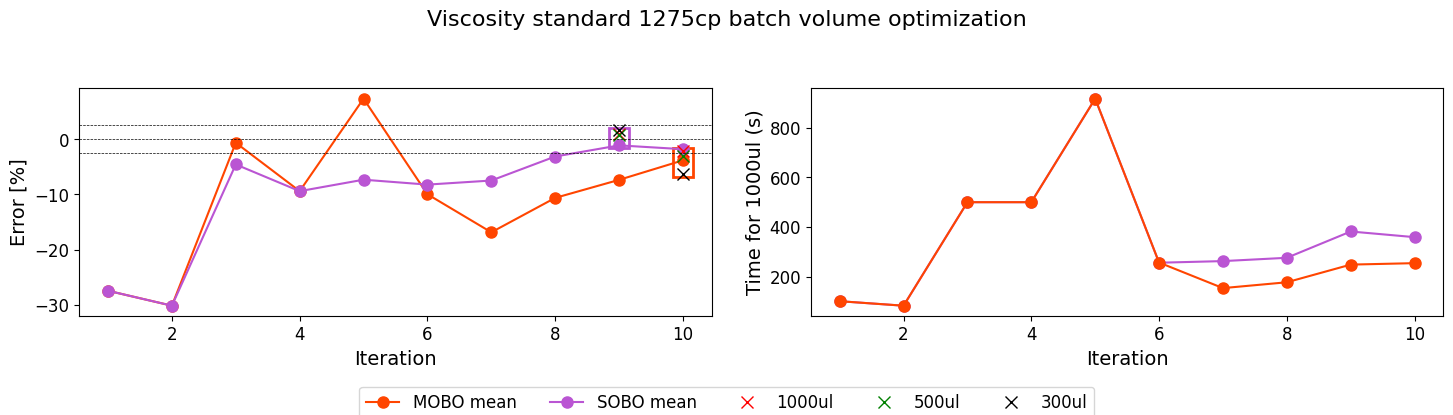

In [104]:
#Making subplots (2 rows, 2 column)
fig,axs = plt.subplots(1,2)

# Dropping NAN rows
df_MOBO_1000 = df_MOBO.where(df_MOBO.volume=='1000').dropna(how='all')
df_MOBO_500 = df_MOBO.where(df_MOBO.volume=='500').dropna(how='all')
df_MOBO_300 = df_MOBO.where(df_MOBO.volume=='300').dropna(how='all')
df_MOBO_100 = df_MOBO.where(df_MOBO.volume=='100').dropna(how='all')
df_MOBO_mean = df_MOBO.where(df_MOBO.volume=='mean[300, 500, 1000]').dropna(how='all')


df_SOBO_1000 = df_SOBO.where(df_SOBO.volume=='1000').dropna(how='all')
df_SOBO_500 = df_SOBO.where(df_SOBO.volume=='500').dropna(how='all')
df_SOBO_300 = df_SOBO.where(df_SOBO.volume=='300').dropna(how='all')
df_SOBO_100 = df_SOBO.where(df_SOBO.volume=='100').dropna(how='all')
df_SOBO_mean = df_SOBO.where(df_SOBO.volume=='mean[100, 500, 1000]').dropna(how='all')

#find min error

df_SOBO_mean_min_iteration = df_SOBO_mean.loc[20:].copy()[['iteration','%error']].abs().sort_values('%error').iloc[0,0]
df_MOBO_mean_min_iteration = df_MOBO_mean.loc[20:].copy()[['iteration','%error']].abs().sort_values('%error').iloc[0,0]

#make new dataframes with minimimum mean error values for manual calibration data
df_MOBO_min_1000 = pd.DataFrame()
df_MOBO_min_1000 = df_MOBO_1000[df_MOBO_1000['iteration'] == df_MOBO_mean_min_iteration]
df_MOBO_min_500 = pd.DataFrame()
df_MOBO_min_500 = df_MOBO_500[df_MOBO_500['iteration'] == df_MOBO_mean_min_iteration]
df_MOBO_min_300 = pd.DataFrame()
df_MOBO_min_300 = df_MOBO_300[df_MOBO_300['iteration'] == df_MOBO_mean_min_iteration]
df_MOBO_min_300 = pd.DataFrame()
df_MOBO_min_300 = df_MOBO_300[df_MOBO_300['iteration'] == df_MOBO_mean_min_iteration]


#make new dataframes with minimimum mean error values for exp3 data
df_SOBO_min_1000 = pd.DataFrame()
df_SOBO_min_1000 = df_SOBO_1000[df_SOBO_1000['iteration'] == df_SOBO_mean_min_iteration]
df_SOBO_min_500 = pd.DataFrame()
df_SOBO_min_500 = df_SOBO_500[df_SOBO_500['iteration'] == df_SOBO_mean_min_iteration]
df_SOBO_min_300 = pd.DataFrame()
df_SOBO_min_300 = df_SOBO_300[df_SOBO_300['iteration'] == df_SOBO_mean_min_iteration]


# Plotting graph 1: Iteration against error
if len(df_MOBO_mean) != 0:
    axs.flatten()[0].plot(df_MOBO_mean['iteration'],df_MOBO_mean['%error'],marker= 'o', label = 'MOBO mean', c = 'orangered')

if len(df_SOBO_mean) != 0:
    axs.flatten()[0].plot(df_SOBO_mean['iteration'],df_SOBO_mean['%error'],marker= 'o', label='SOBO mean',c = 'mediumorchid')


if len(df_MOBO_min_1000) != 0:
    axs.flatten()[0].plot(df_MOBO_min_1000.dropna()['iteration'],df_MOBO_min_1000.dropna()['%error'], marker= 'x', label = '1000ul',  c = 'red',linestyle="None")

if len(df_MOBO_min_500) != 0:
    axs.flatten()[0].plot(df_MOBO_min_500.dropna()['iteration'],df_MOBO_min_500.dropna()['%error'], marker= 'x', label = '500ul', c = 'green',linestyle="None")

if len(df_MOBO_min_300) != 0:
    axs.flatten()[0].plot(df_MOBO_min_300.dropna()['iteration'],df_MOBO_min_300.dropna()['%error'], marker= 'x', label = '300ul', c = 'black',linestyle="None")


if len(df_SOBO_min_1000) != 0:
    axs.flatten()[0].plot(df_SOBO_min_1000['iteration'],df_SOBO_min_1000['%error'], marker= 'x', c = 'red',linestyle="None")

if len(df_SOBO_min_500) != 0:
    axs.flatten()[0].plot(df_SOBO_min_500['iteration'],df_SOBO_min_500['%error'], marker= 'x', c = 'green',linestyle="None")

if len(df_SOBO_min_300) != 0:
    axs.flatten()[0].plot(df_SOBO_min_300['iteration'],df_SOBO_min_300['%error'], marker= 'x', c = 'black',linestyle="None")

for i in range(len(axs.flatten())-1):
    axs.flatten()[i].axhline(y=0, ls = '--', color = 'black', linewidth=0.5)
    axs.flatten()[i].axhline(y=2.5, ls = '--', color = 'black', linewidth=0.5)
    axs.flatten()[i].axhline(y=-2.5, ls = '--', color = 'black', linewidth=0.5)
    axs.flatten()[i].set_xlabel('Iteration')
    axs.flatten()[i].set_ylabel('Error [%]')



if len(df_SOBO_mean) != 0:
    axs.flatten()[1].plot(df_SOBO_mean['iteration'],df_SOBO_mean['time_asp_1000'], marker ='o', c = 'mediumorchid')


axs.flatten()[1].plot(df_MOBO_mean['iteration'],df_MOBO_mean['time_asp_1000'], marker= 'o', c = 'orangered')

axs.flatten()[1].set_xlabel('Iteration')
axs.flatten()[1].set_ylabel('Time for 1000ul (s)')

fig.set_size_inches(15, 4)
fig.suptitle('Viscosity standard '+str(std)+ 'cp batch volume optimization')
fig.tight_layout(pad=2)
fig.legend( loc='lower center',ncol=5, borderaxespad=-0.2)

xmargin = .15
ymargin = .5

MOBO_best_iter = df_MOBO_mean_min_iteration
SOBO_best_iter = df_SOBO_mean_min_iteration

df_MOBO_box = df_MOBO[df_MOBO['iteration'] == MOBO_best_iter]

MOBO_min_f0, MOBO_max_f0 = min(df_MOBO_box['iteration']) - xmargin, max(df_MOBO_box['iteration']) + xmargin
MOBO_min_f1, MOBO_max_f1 = min(df_MOBO_box['%error']) - ymargin, max(df_MOBO_box['%error']) + ymargin

MOBO_width = MOBO_max_f0 - MOBO_min_f0
MOBO_height = MOBO_max_f1 - MOBO_min_f1

import matplotlib.patches as patches

axs[0].add_patch(
    patches.Rectangle(
        xy=(MOBO_min_f0, MOBO_min_f1),  # point of origin.
        width=MOBO_width, height=MOBO_height, linewidth=2,
        color='orangered', fill=False))

df_SOBO_box = df_SOBO[df_SOBO['iteration'] == SOBO_best_iter]

SOBO_min_f0, SOBO_max_f0 = min(df_SOBO_box['iteration']) - xmargin, max(df_SOBO_box['iteration']) + xmargin
SOBO_min_f1, SOBO_max_f1 = min(df_SOBO_box['%error']) - ymargin, max(df_SOBO_box['%error']) + ymargin

SOBO_width = SOBO_max_f0 - SOBO_min_f0
SOBO_height = SOBO_max_f1 - SOBO_min_f1


axs[0].add_patch(
    patches.Rectangle(
        xy=(SOBO_min_f0, SOBO_min_f1),  # point of origin.
        width=SOBO_width, height=SOBO_height, linewidth=2,
        color='mediumorchid', fill=False))

REPO = 'viscosity_liquid_transfer_Pablo'
folder = os.getcwd().split(REPO)[0]+REPO+r'\Opentrons_experiments\BOTorch_optimization'
fig.savefig(folder+r'\MO_vs_SO\\'+'Viscosity_std_'+std+'_MO_vs_SO_line.png', dpi=1200)
